### California housing dataset

In [1]:
# Import the required function
from sklearn.datasets import fetch_california_housing

# Fetch the dataset
california_data = fetch_california_housing(as_frame=True)

# Access the data and target as a pandas DataFrame
california_df = california_data.frame

# Display the first few rows of the dataset
california_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
print(california_data.data.shape, california_data.target.shape)
print(california_data.feature_names)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [12]:
import matplotlib.pyplot as plt

In [19]:
data = california_data.data
target = california_data.target

# Data visualizing

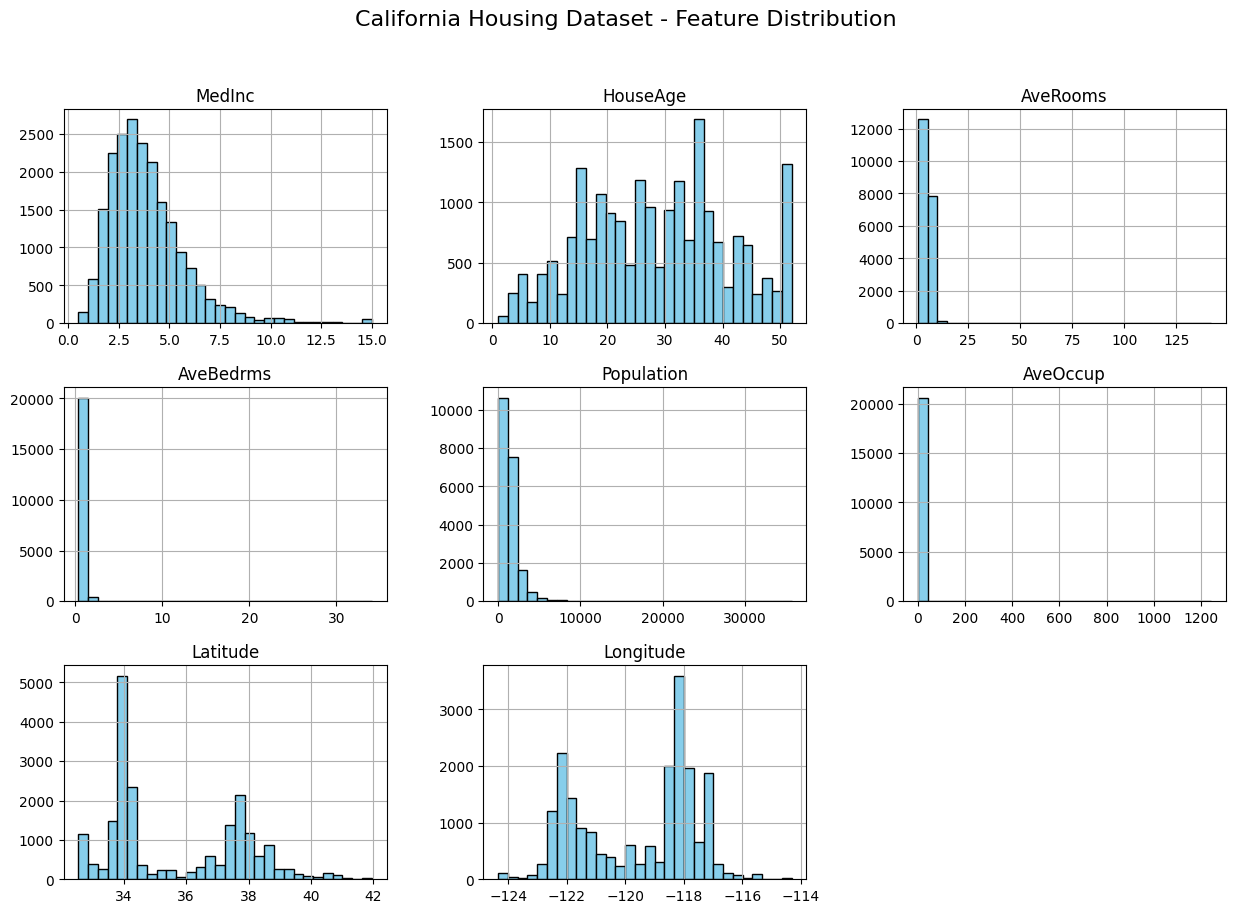

In [26]:
data.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("California Housing Dataset - Feature Distribution", fontsize=16)
plt.show()

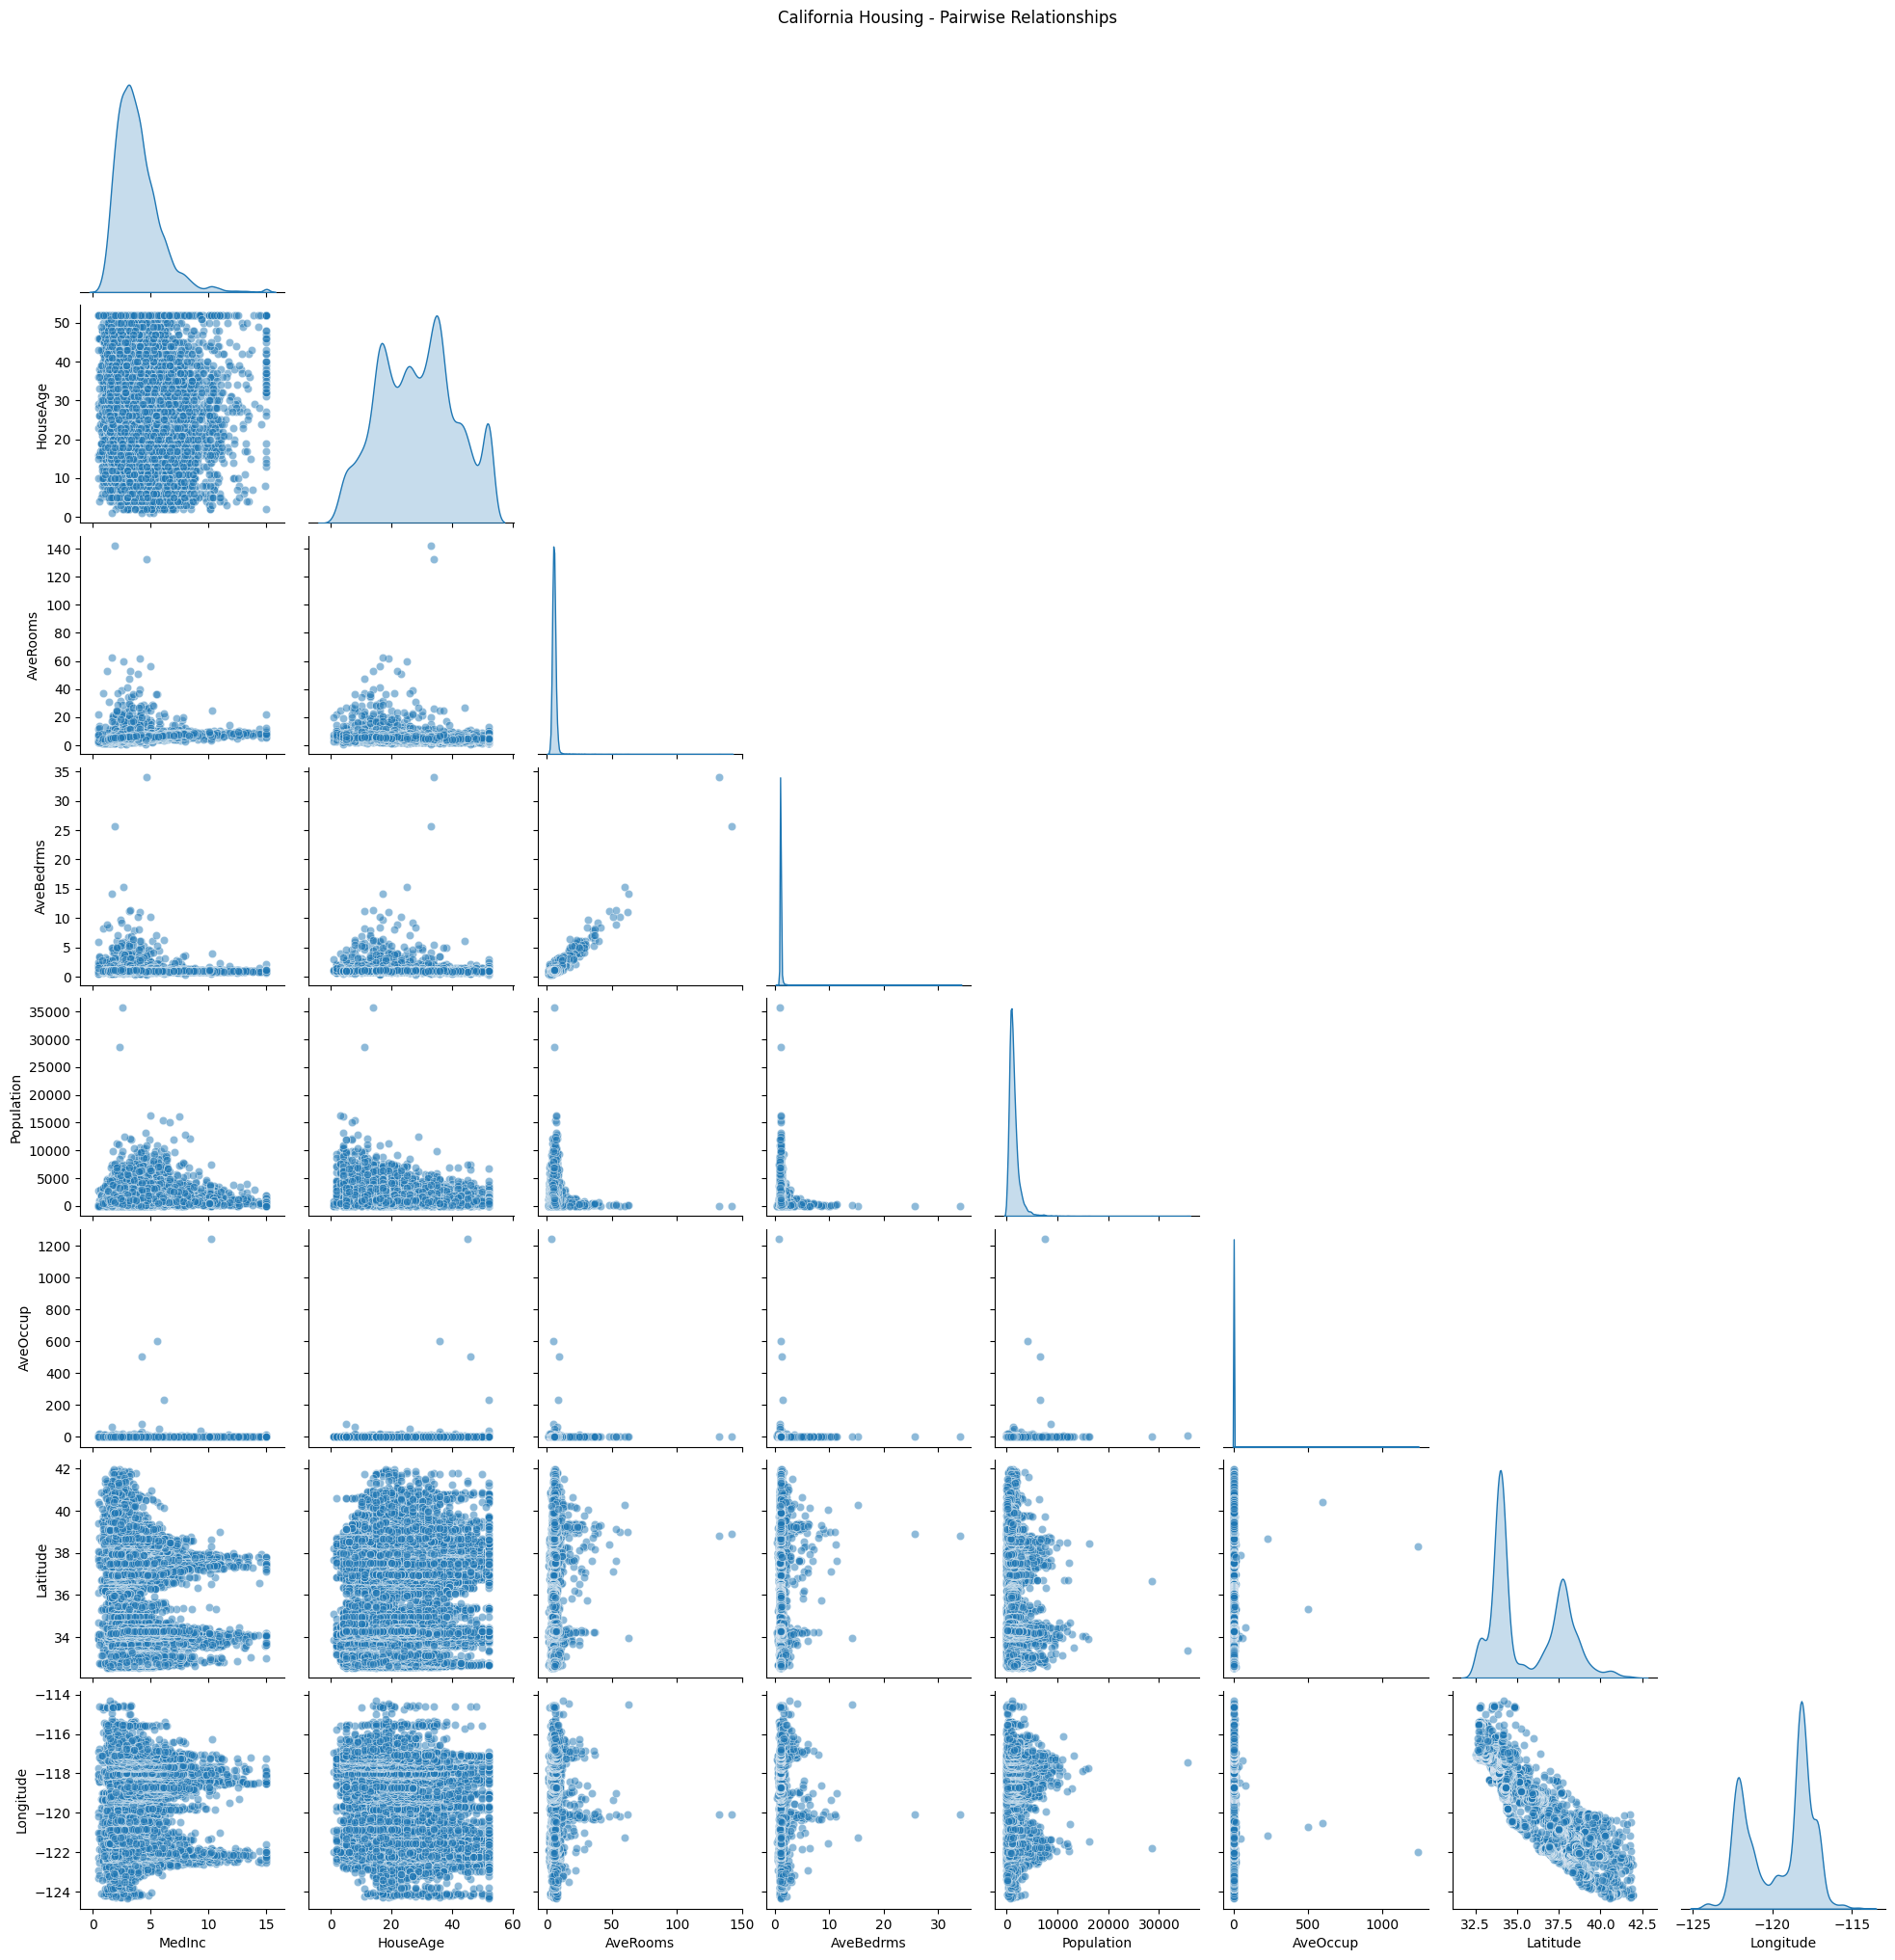

In [43]:
import seaborn as sns

sns.pairplot(data, corner=True, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("California Housing - Pairwise Relationships", y=1.02)
plt.show()

/var/folders/9w/ft0tywhn76j1gh647345mmy80000gn/T/ipykernel_11767/1268794377.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


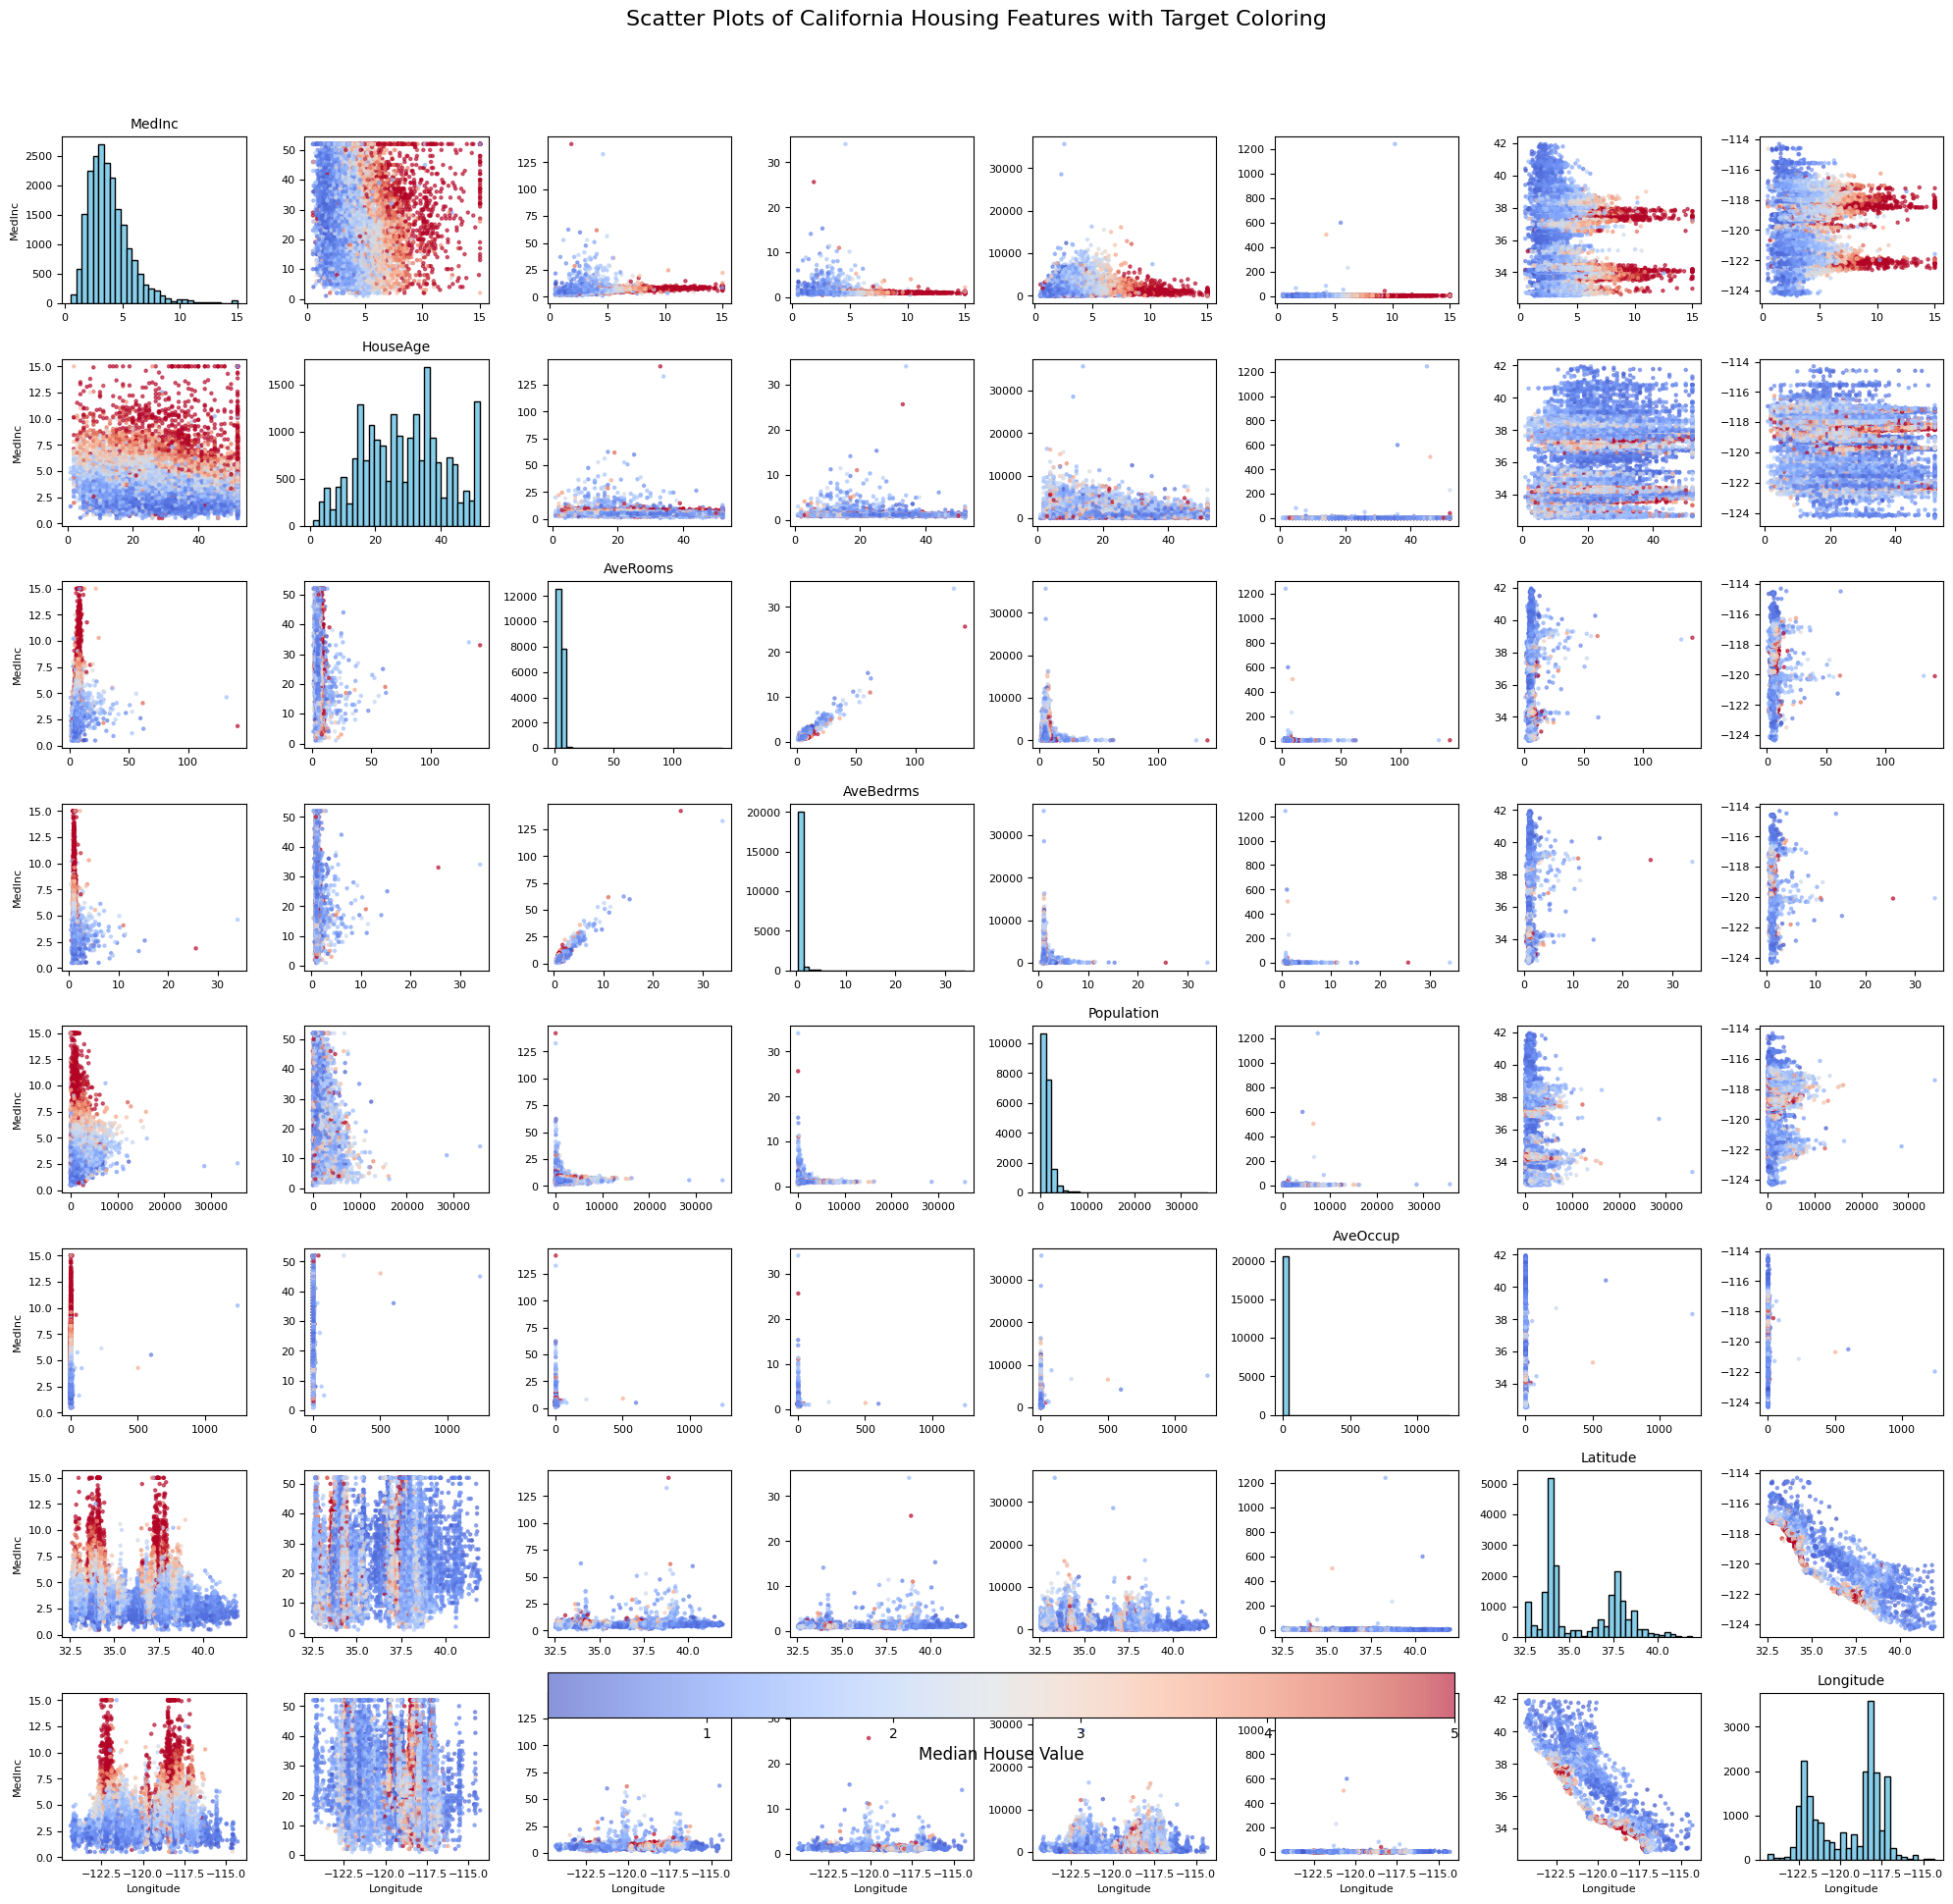

In [48]:
# Get the list of features
features = california_data.feature_names
n_features = len(features)

# Create subplots grid
fig, axes = plt.subplots(n_features, n_features, figsize=(20, 20), sharex=False, sharey=False)

# Iterate through feature pairs
for i, feature_x in enumerate(features):
    for j, feature_y in enumerate(features):
        ax = axes[i, j]

        # If diagonal, show histogram
        if i == j:
            ax.hist(data[feature_x], bins=30, color='skyblue', edgecolor='black')
            ax.set_title(feature_x, fontsize=10)
            ax.tick_params(labelsize=8)
        else:
            # Scatter plot for feature pairs
            scatter = ax.scatter(data[feature_x], data[feature_y], c=target, cmap='coolwarm', s=5, alpha=0.6)
            ax.tick_params(labelsize=8)

        # Set labels for edge subplots
        if i == n_features - 1:
            ax.set_xlabel(feature_x, fontsize=8)
        if j == 0:
            ax.set_ylabel(feature_y, fontsize=8)

# Add a colorbar
cbar = fig.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.03, pad=0.04)
cbar.set_label('Median House Value', fontsize=12)

plt.suptitle('Scatter Plots of California Housing Features with Target Coloring', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

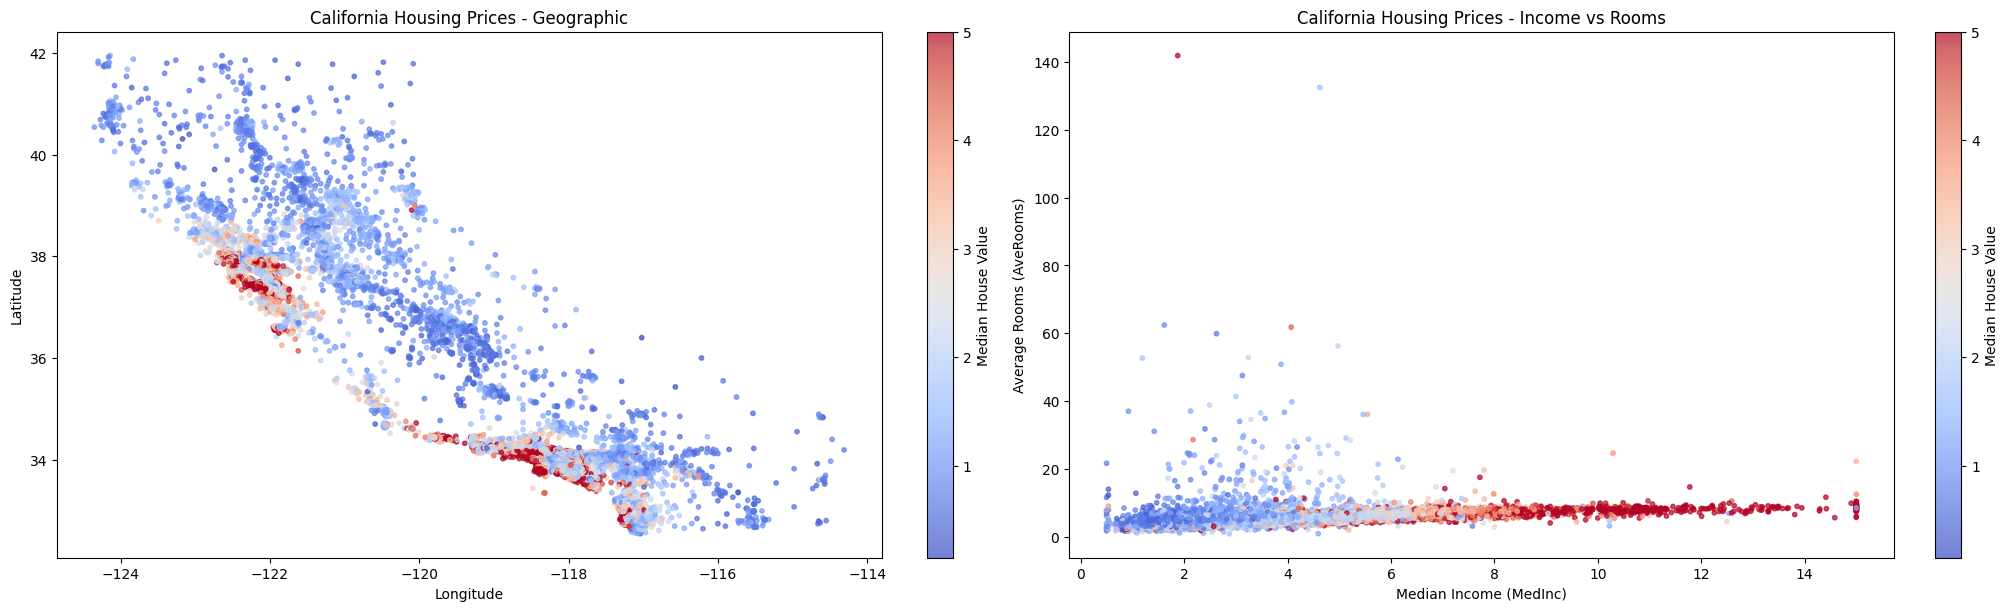

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6), constrained_layout=True)

# First subplot: Geospatial visualization
scatter1 = axes[0].scatter(data['Longitude'], data['Latitude'], c=target, cmap='coolwarm', s=10, alpha=0.7)
fig.colorbar(scatter1, ax=axes[0], label='Median House Value')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('California Housing Prices - Geographic')

# Second subplot: Median Income vs Average Rooms
scatter2 = axes[1].scatter(data['MedInc'], data['AveRooms'], c=target, cmap='coolwarm', s=10, alpha=0.7)
fig.colorbar(scatter2, ax=axes[1], label='Median House Value')
axes[1].set_xlabel('Median Income (MedInc)')
axes[1].set_ylabel('Average Rooms (AveRooms)')
axes[1].set_title('California Housing Prices - Income vs Rooms')

plt.show()

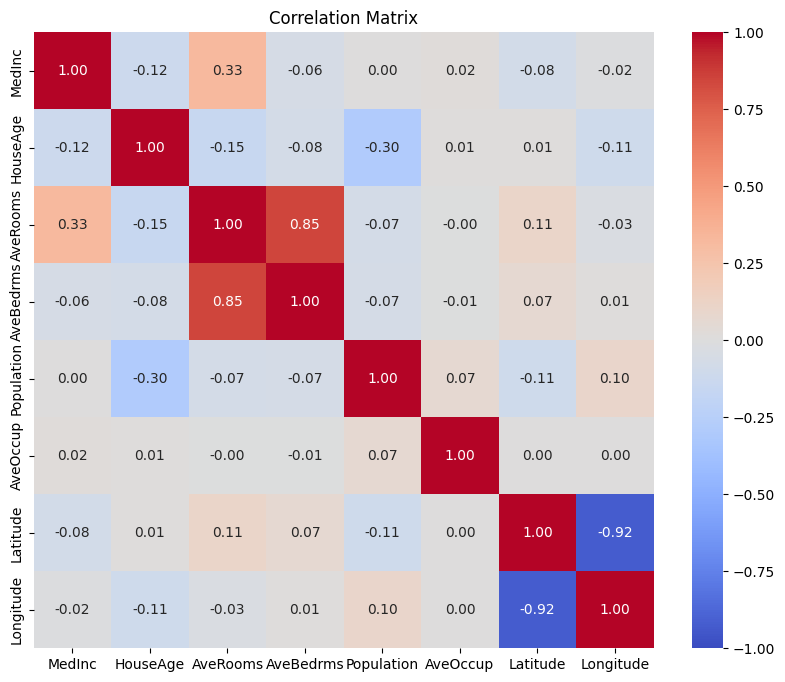

In [34]:
import numpy as np

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [17]:
#check for missing values
california_data.data.isnull().values.any()

np.False_